In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets

from myapp import lasso

np.random.seed(1234567)

In [2]:
x, y = datasets.load_diabetes(return_X_y=True)
y = y[:, None]

x.shape, y.shape

((442, 10), (442, 1))

In [3]:
posterior_samples = lasso.gibbs_sampling(x, y)

  5%|▌         | 130/2500 [00:00<00:03, 676.96it/s]/Users/ryosukenagumo/bayesian_workflow/.venv/lib/python3.9/site-packages/scipy/stats/_multivariate.py:653: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)
100%|██████████| 2500/2500 [00:02<00:00, 928.36it/s]


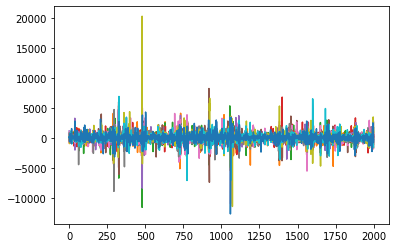

In [4]:
plt.plot(posterior_samples.beta)
plt.show()

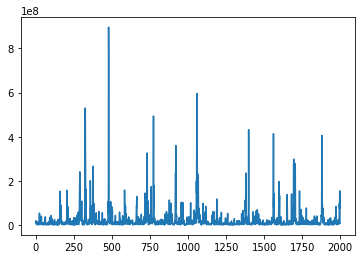

In [5]:
plt.plot(posterior_samples.sigma_2)

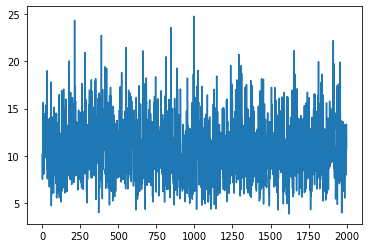

In [6]:
plt.plot(posterior_samples.lmbda)

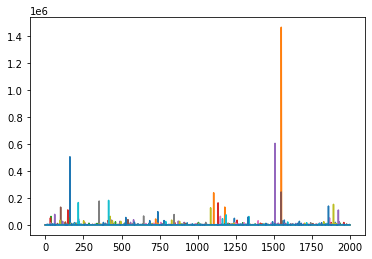

In [7]:
plt.plot(posterior_samples.u_inv)
plt.show()

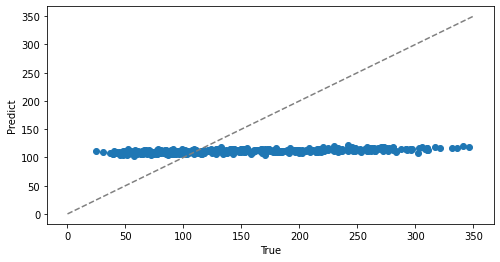

In [8]:
y_pred = lasso.predict(x, posterior_samples)

plt.figure(figsize=(8, 4))
plt.scatter(y.ravel(), y_pred.mean(0).ravel())
plt.plot([0, 350], [0, 350], linestyle="--", color="grey")
plt.xlabel("True")
plt.ylabel("Predict")
plt.show()

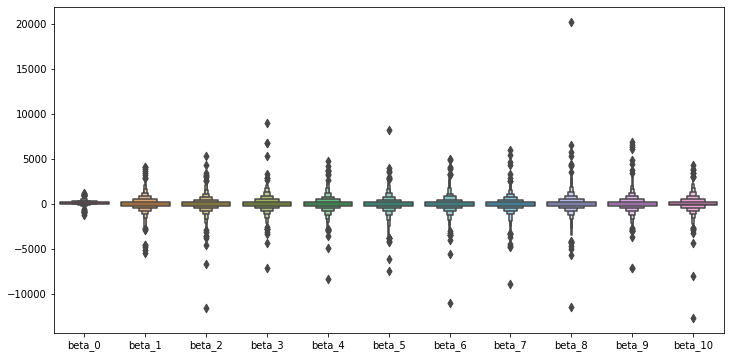

In [9]:
df_beta = pd.DataFrame(posterior_samples.beta, columns=[f"beta_{i}" for i in range(x.shape[1] + 1)])

plt.figure(figsize=(12, 6))
sns.boxenplot(data=df_beta)
plt.show()